# Hackathon_EDA

In [192]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r"D:\Data Science\linear regression\Hackathon\Black Friday Sales\train.csv")
test = pd.read_csv(r"D:\Data Science\linear regression\Hackathon\Black Friday Sales\test.csv")
sample_submission = pd.read_csv(r"D:\Data Science\linear regression\Hackathon\Black Friday Sales\sample_submission.csv")

In [4]:
train.shape,test.shape

((550068, 12), (233599, 11))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [9]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [34]:
train['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [10]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [29]:
for i in train['Occupation'].value_counts():
    if train['Occupation'].value_counts()[1] < 20000:
        print('hello')

In [32]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [12]:
train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [13]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [14]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [21]:
train.groupby(by=['Product_ID','Age']).mean()

User_ID  Occupation  Marital_Status  ...  Product_Category_2  Product_Category_3      Purchase
Product_ID Age                                              ...                                                      
P00000142  0-17   1.002733e+06    9.400000        0.000000  ...                 4.0                 5.0  10798.654545
           18-25  1.002784e+06    6.795367        0.216216  ...                 4.0                 5.0  10823.984556
           26-35  1.003185e+06    8.004494        0.420225  ...                 4.0                 5.0  11222.791011
           36-45  1.003257e+06    8.622807        0.355263  ...                 4.0                 5.0  11657.521930
           46-50  1.003324e+06    8.578313        0.674699  ...                 4.0                 5.0  10832.433735
...                        ...         ...             ...  ...                 ...                 ...           ...
P0099942   18-25  1.004197e+06    4.666667        0.333333  ...                12.0                14.0   4718.666667
           26-35  1.002691e+06   15.666667        0.333333  ...                12.0                14.0   6458.000000
           36-45  1.002336e+06    5.500000        0.500000  ...                12.0                14.0   5388.000000
           51-55  1.002678e+06    5.750000        1.000000  ...                12.0                14.0   5736.000000
           55+    1.003222e+06   10.500000        0.500000  ...                12.0                14.0   5384.500000

[20875 rows x 7 columns]

In [20]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [22]:
sample_submission.head()


,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842


In [35]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [36]:
    f,ax = plt.subplots(1,2,figsize=(8,6))
    train['Stay_In_Current_City_Years'].value_counts().plot.pie(ax = ax[0],subplots = True , figsize = (11,6),autopct = '%1.1f%%')
    sns.countplot('Purchase',hue = 'Stay_In_Current_City_Years', data = train,ax = ax[1])
    plt.show()

KeyboardInterrupt: 

In [52]:
#Stay_In_Current_City_Years does not impact vthe Purchase (Target) much  as the mean remains the same 

train.groupby(by=['Stay_In_Current_City_Years']).describe()[['Occupation','Purchase','Product_Category_1','Product_Category_2','Product_Category_3']].T

Stay_In_Current_City_Years             0              1              2             3            4+
Occupation         count    74398.000000  193821.000000  101838.000000  95285.000000  84726.000000
                   mean         7.646980       8.058208       7.902698      8.446838      8.289262
                   std          6.511152       6.470626       6.427448      6.657318      6.581260
                   min          0.000000       0.000000       0.000000      0.000000      0.000000
                   25%          2.000000       2.000000       2.000000      2.000000      3.000000
                   50%          5.000000       7.000000       7.000000      7.000000      7.000000
                   75%         14.000000      14.000000      14.000000     15.000000     14.000000
                   max         20.000000      20.000000      20.000000     20.000000     20.000000
Purchase           count    74398.000000  193821.000000  101838.000000  95285.000000  84726.000000
                   mean      9180.075123    9250.145923    9320.429810   9286.904119   9275.598872
                   std       4990.479940    5027.476933    5044.588224   5020.343541   5017.627594
                   min         12.000000      12.000000      12.000000     12.000000     12.000000
                   25%       5480.000000    5500.000000    5846.000000   5832.000000   5844.000000
                   50%       8025.000000    8041.000000    8072.000000   8047.000000   8052.000000
                   75%      11990.000000   12042.000000   12117.000000  12075.000000  12038.000000
                   max      23960.000000   23961.000000   23961.000000  23961.000000  23958.000000
Product_Category_1 count    74398.000000  193821.000000  101838.000000  95285.000000  84726.000000
                   mean         5.449810       5.436934       5.346462      5.309723      5.465371
                   std          3.939848       3.941934       3.945432      3.900933      3.945596
                   min          1.000000       1.000000       1.000000      1.000000      1.000000
                   25%          2.000000       1.000000       1.000000      1.000000      1.000000
                   50%          5.000000       5.000000       5.000000      5.000000      5.000000
                   75%          8.000000       8.000000       8.000000      8.000000      8.000000
                   max         20.000000      20.000000      20.000000     20.000000     20.000000
Product_Category_2 count    50491.000000  132368.000000   70255.000000  65598.000000  57718.000000
                   mean         9.856866       9.881633       9.772685      9.771060      9.905246
                   std          5.084878       5.075422       5.100219      5.107151      5.071895
                   min          2.000000       2.000000       2.000000      2.000000      2.000000
                   25%          5.000000       5.000000       5.000000      5.000000      5.000000
                   50%          9.000000       9.000000       9.000000      9.000000      9.000000
                   75%         15.000000      15.000000      15.000000     15.000000     15.000000
                   max         18.000000      18.000000      18.000000     18.000000     18.000000
Product_Category_3 count    22389.000000   58287.000000   31515.000000  29268.000000  25362.000000
                   mean        12.665237      12.679654      12.615834     12.658911     12.720566
                   std          4.128454       4.130540       4.139059      4.118922      4.100395
                   min          3.000000       3.000000       3.000000      3.000000      3.000000
                   25%          9.000000       9.000000       9.000000      9.000000      9.000000
                   50%         14.000000      14.000000      14.000000     14.000000     14.000000
                   75%         16.000000      16.000000      16.000000     16.000000     16.000000
                   max         18.000000

In [59]:
train.groupby(by=['Age']).mean()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Age,,,,,,,
0-17,1.002722e+06,8.761025,0.000000,5.083764,9.030334,11.845885,8933.464640
18-25,1.002801e+06,6.736384,0.211880,5.111088,9.470278,12.391142,9169.663606
26-35,1.003113e+06,7.896975,0.392970,5.314272,9.811388,12.647127,9252.690633
36-45,1.003066e+06,8.837365,0.396644,5.494242,9.954625,12.750849,9331.350695
46-50,1.003190e+06,8.517078,0.722326,5.742194,10.176459,12.939958,9208.625697
51-55,1.002985e+06,8.810109,0.718475,5.774214,10.281663,13.105320,9534.808031
55+,1.002986e+06,9.502697,0.633417,6.066313,10.464882,13.151577,9336.280459


In [60]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [62]:
train[train.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [63]:
train['source'] = 'train'
test['source'] = 'test'

In [65]:
df = pd.concat([train,test])

In [68]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,test
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,test
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,test
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,test
233598,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN,test


In [70]:
df.shape

(783667, 13)

In [73]:
df['Age'].value_counts()

26       313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [74]:
df['Age'] = df['Age'].replace({'36-45':36,'18-25':18,'46-50':46,'51-55':51,'55+':55,'0-17':10})
#df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [76]:
df['Age'].value_counts()

26    313015
36    156724
18    141953
46     65278
51     54784
55     30579
10     21334
Name: Age, dtype: int64

In [78]:
df['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [79]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace({'4+':4})

In [80]:
df['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [83]:
train.groupby(by=['City_Category']).describe()['Purchase'].T

City_Category,A,B,C
count,147720.000000,231173.000000,171175.000000
mean,8911.939216,9151.300563,9719.920993
std,4892.115238,4955.496566,5189.465121
min,12.000000,12.000000,12.000000
25%,5403.000000,5460.000000,6031.500000
50%,7931.000000,8005.000000,8585.000000
75%,11786.000000,11986.000000,13197.000000
max,23961.000000,23960.000000,23961.000000


In [84]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,10,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,10,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,10,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,10,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55,16,C,4,0,8,NaN,NaN,7969.0,train


<AxesSubplot:>

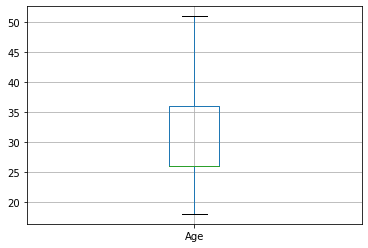

In [92]:
df.boxplot(column='Age')

In [90]:
    q1 = df['Age'].quantile(0.25)
    q3 = df['Age'].quantile(0.75)
    iqr = q3-q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print(low,"*****",high)
    df.loc[(df['Age'] <low) | (df['Age']>high),'Age'] = df['Age'].mean()

11.0 ***** 51.0


In [96]:
df['Stay_In_Current_City_Years'].value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [97]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4':4})

In [101]:
df['Stay_In_Current_City_Years'].value_counts()

1.0    276425
2.0    145427
3.0    135428
4.0    120671
0.0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [100]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].fillna(4)

<AxesSubplot:>

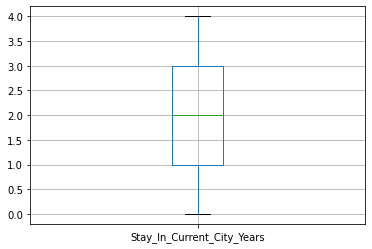

In [102]:
df.boxplot(column='Stay_In_Current_City_Years')

In [103]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'source'],
      dtype='object')

In [104]:
df.groupby(by=['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']).describe().T

Gender                                 F                              ...             M                            
Age                                 18.0                              ...          51.0                            
Occupation                            0                               ...            20                            
City_Category                          A                              ...             C                            
Stay_In_Current_City_Years           0.0           1.0                ...           1.0           2.0              
Marital_Status                         0             0             1  ...             1             0             1
User_ID            count    1.300000e+02  7.800000e+01  3.200000e+01  ...  1.100000e+02  2.800000e+01  1.650000e+02
                   mean     1.000034e+06  1.003486e+06  1.000378e+06  ...  1.005889e+06  1.001872e+06  1.002362e+06
                   std      0.000000e+00  0.000000e+00  0.000000e+00  ...  0.000000e+00  0.000000e+00  8.160089e+02
                   min      1.000034e+06  1.003486e+06  1.000378e+06  ...  1.005889e+06  1.001872e+06  1.000794e+06
                   25%      1.000034e+06  1.003486e+06  1.000378e+06  ...  1.005889e+06  1.001872e+06  1.002784e+06
                   50%      1.000034e+06  1.003486e+06  1.000378e+06  ...  1.005889e+06  1.001872e+06  1.002784e+06
                   75%      1.000034e+06  1.003486e+06  1.000378e+06  ...  1.005889e+06  1.001872e+06  1.002784e+06
                   max      1.000034e+06  1.003486e+06  1.000378e+06  ...  1.005889e+06  1.001872e+06  1.002784e+06
Product_Category_1 count    1.300000e+02  7.800000e+01  3.200000e+01  ...  1.100000e+02  2.800000e+01  1.650000e+02
                   mean     5.269231e+00  4.397436e+00  5.843750e+00  ...  5.918182e+00  6.321429e+00  6.030303e+00
                   std      2.906258e+00  3.370382e+00  3.520533e+00  ...  3.427176e+00  4.128075e+00  3.353964e+00
                   min      1.000000e+00  1.000000e+00  1.000000e+00  ...  1.000000e+00  1.000000e+00  1.000000e+00
                   25%      5.000000e+00  3.000000e+00  4.500000e+00  ...  5.000000e+00  5.000000e+00  5.000000e+00
                   50%      5.000000e+00  3.000000e+00  5.000000e+00  ...  5.000000e+00  5.000000e+00  5.000000e+00
                   75%      5.000000e+00  4.000000e+00  8.000000e+00  ...  8.000000e+00  8.000000e+00  8.000000e+00
                   max      2.000000e+01  2.000000e+01  2.000000e+01  ...  1.900000e+01  1.600000e+01  1.900000e+01
Product_Category_2 count    8.200000e+01  7.400000e+01  2.100000e+01  ...  6.600000e+01  2.400000e+01  1.040000e+02
                   mean     1.082927e+01  6.635135e+00  1.019048e+01  ...  9.560606e+00  1.241667e+01  1.023077e+01
                   std      4.354095e+00  3.939871e+00  4.545537e+00  ...  4.723521e+00  4.169419e+00  4.231713e+00
                   min      2.000000e+00  2.000000e+00  4.000000e+00  ...  2.000000e+00  5.000000e+00  2.000000e+00
                   25%      8.000000e+00  4.000000e+00  8.000000e+00  ...  5.250000e+00  8.000000e+00  8.000000e+00
                   50%      1.400000e+01  4.000000e+00  8.000000e+00  ...  8.000000e+00  1.400000e+01  8.000000e+00
                   75%      1.400000e+01  1.050000e+01  1.500000e+01  ...  1.400000e+01  1.600000e+01  1.400000e+01
                   max      1.800000e+01  1.700000e+01  1.700000e+01  ...  1.800000e+01  1.700000e+01  1.700000e+01
Product_Category_3 count    3.000000e+01  3.800000e+01  7.000000e+00  ...  2.800000e+01  1.100000e+01  4.200000e+01
                   mean     1.120000e+01  9.473684e+00  1.385714e+01  ...  1.217857e+01  1.472727e+01  1.366667e+01
                   std      4.513581e+00  3.454232e+00  4.140393e+00  ...  4.397420e+00  2.533413e+00  3.700143e+00
                   min      5.000000e+00  4.000000e+00  5.000000e+00  ...  5.000000e+00  8.000000e+00  5.000000e+00
                   25%      6.500000e+00  5.750000e+00  

In [105]:
df['Product_Category_2'] = df.groupby(by=['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']).Product_Category_2.transform(lambda x:x.fillna(x.mean()))
df['Product_Category_3'] = df.groupby(by=['Gender', 'Age', 'Occupation', 'City_Category','Stay_In_Current_City_Years', 'Marital_Status']).Product_Category_3.transform(lambda x:x.fillna(x.mean()))


In [106]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                72
Purchase                      233599
source                             0
dtype: int64

In [115]:
df['Product_Category_3'].isna().sum()

0

In [114]:
df['Product_Category_3'] = df['Product_Category_3'].transform(lambda x:x.fillna(x.mean()))

In [116]:
df['Product_Category_3'].mean()

12.682696950251872

In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1.001519e+06,1.003075e+06,1.004478e+06,1006040.0
Age,783667.0,3.027313e+01,9.580305,18.0,2.600000e+01,2.600000e+01,3.600000e+01,51.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.000000e+00,7.000000e+00,1.400000e+01,20.0
Stay_In_Current_City_Years,783667.0,1.858247e+00,1.288790,0.0,1.000000e+00,2.000000e+00,3.000000e+00,4.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.000000e+00,5.000000e+00,8.000000e+00,20.0
Product_Category_2,783667.0,9.874504e+00,4.236748,2.0,8.000000e+00,9.878453e+00,1.400000e+01,18.0
Product_Category_3,783667.0,1.268270e+01,2.343124,3.0,1.225263e+01,1.276190e+01,1.347436e+01,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5.823000e+03,8.047000e+03,1.205400e+04,23961.0


<AxesSubplot:>

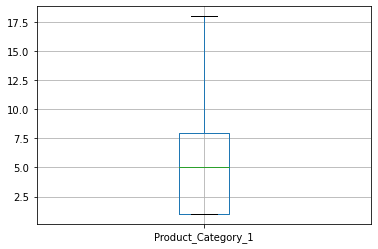

In [162]:
df.boxplot(column='Product_Category_1')

<AxesSubplot:>

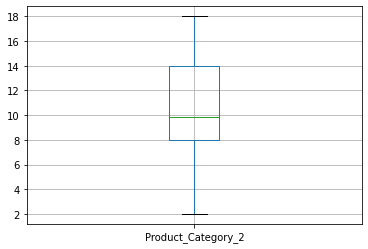

In [119]:
df.boxplot(column='Product_Category_2')

<AxesSubplot:>

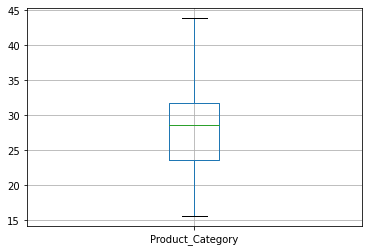

In [172]:
df.boxplot(column='Product_Category')

In [126]:
df['Product_Category_3'].value_counts()

12.682697    152942
12.844900    107448
12.000000     13654
13.000000     10289
12.646567      3487
              ...  
11.789474        18
12.037037        18
13.913043        16
11.642857        16
11.777778        11
Name: Product_Category_3, Length: 1409, dtype: int64

In [161]:
    q1 = df['Product_Category_1'].quantile(0.25)
    q3 = df['Product_Category_1'].quantile(0.75)
    iqr = q3-q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print(low,"*****",high)
    df.loc[(df['Product_Category_1'] <low) | (df['Product_Category_1']>high),'Product_Category_1'] = df['Product_Category_1'].mean()

-9.5 ***** 18.5


In [163]:
df['Product_Category']=df['Product_Category_1']+df['Product_Category_2']+df['Product_Category_3']

In [165]:
df.drop(columns=['Product_Category_1','Product_Category_2','Product_Category_3'],inplace=True)

In [166]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,source,Product_Category
0,1000001,P00069042,F,30.660427,10,A,2.0,0,8370.0,train,23.881979
1,1000001,P00248942,F,30.660427,10,A,2.0,0,15200.0,train,19.733330
2,1000001,P00087842,F,30.660427,10,A,2.0,0,1422.0,train,32.881979
3,1000001,P00085442,F,30.660427,10,A,2.0,0,1057.0,train,38.733330
4,1000002,P00285442,M,30.660427,16,C,4.0,0,7969.0,train,30.729841


In [171]:
q1 = df['Product_Category'].quantile(0.25)
q3 = df['Product_Category'].quantile(0.75)
iqr = q3-q1
    
low = q1-1.5*iqr
high = q3+1.5*iqr
print(low,"*****",high)
df.loc[(df['Product_Category'] <low) | (df['Product_Category']>high),'Product_Category'] = df['Product_Category'].mean()

11.48452031984061 ***** 43.882616430690305


In [170]:
df.loc[(df['Product_Category'] <low) | (df['Product_Category']>high),'Product_Category'] 

958       44.739553
1211      44.721412
1928      44.739018
2681      44.735069
2958      44.714286
            ...    
232331    44.739553
232771    44.735069
232969    44.720407
233053    44.687500
233581    44.720407
Name: Product_Category, Length: 1149, dtype: float64

In [181]:
categories_ = df.select_dtypes(exclude = np.number).drop(columns=['Product_ID','source'])

In [182]:
categories_encoded = pd.get_dummies(categories_)

In [183]:
categories_encoded

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
233594,1,0,0,1,0
233595,1,0,0,1,0
233596,1,0,0,1,0
233597,1,0,0,0,1


In [184]:
Numerical = df.select_dtypes(include= np.number)

In [188]:
Numerical

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category
0,30.660427,10,2.0,0,23.881979
1,30.660427,10,2.0,0,19.733330
2,30.660427,10,2.0,0,32.881979
3,30.660427,10,2.0,0,38.733330
4,30.660427,16,4.0,0,30.729841
...,...,...,...,...,...
233594,26.000000,15,4.0,1,31.357595
233595,26.000000,15,4.0,1,25.720407
233596,26.000000,15,4.0,1,18.720407
233597,46.000000,1,4.0,0,38.720407


In [189]:
categories_encoded

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
233594,1,0,0,1,0
233595,1,0,0,1,0
233596,1,0,0,1,0
233597,1,0,0,0,1


In [190]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase,source,Product_Category
0,1000001,P00069042,F,30.660427,10,A,2.0,0,8370.0,train,23.881979
1,1000001,P00248942,F,30.660427,10,A,2.0,0,15200.0,train,19.733330
2,1000001,P00087842,F,30.660427,10,A,2.0,0,1422.0,train,32.881979
3,1000001,P00085442,F,30.660427,10,A,2.0,0,1057.0,train,38.733330
4,1000002,P00285442,M,30.660427,16,C,4.0,0,7969.0,train,30.729841


In [246]:
Numerical

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category
0,30.660427,10,2.0,0,23.881979
1,30.660427,10,2.0,0,19.733330
2,30.660427,10,2.0,0,32.881979
3,30.660427,10,2.0,0,38.733330
4,30.660427,16,4.0,0,30.729841
...,...,...,...,...,...
233594,26.000000,15,4.0,1,31.357595
233595,26.000000,15,4.0,1,25.720407
233596,26.000000,15,4.0,1,18.720407
233597,46.000000,1,4.0,0,38.720407


In [193]:
#Feature SCaling 

std_scale = StandardScaler()
df_std = std_scale.fit_transform(Numerical)

In [194]:
df_std

array([[ 0.04042618,  0.29448639,  0.1099891 , -0.83323222, -0.59705504],
       [ 0.04042618,  0.29448639,  0.1099891 , -0.83323222, -1.22039856],
       [ 0.04042618,  0.29448639,  0.1099891 , -0.83323222,  0.75521462],
       ...,
       [-0.44603328,  1.06109863,  1.66183281,  1.20014562, -1.37259255],
       [ 1.6415842 , -1.08541565,  1.66183281, -0.83323222,  1.63245114],
       [ 1.6415842 , -1.2387381 ,  1.66183281,  1.20014562, -0.91963295]])

In [195]:
numerical_preprocessed_data = pd.DataFrame(df_std,columns = Numerical.columns)

In [196]:
numerical_preprocessed_data

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category
0,0.040426,0.294486,0.109989,-0.833232,-0.597055
1,0.040426,0.294486,0.109989,-0.833232,-1.220399
2,0.040426,0.294486,0.109989,-0.833232,0.755215
3,0.040426,0.294486,0.109989,-0.833232,1.634393
4,0.040426,1.214421,1.661833,-0.833232,0.431851
...,...,...,...,...,...
783662,-0.446033,1.061099,1.661833,1.200146,0.526173
783663,-0.446033,1.061099,1.661833,1.200146,-0.320827
783664,-0.446033,1.061099,1.661833,1.200146,-1.372593
783665,1.641584,-1.085416,1.661833,-0.833232,1.632451


In [225]:
final_df = pd.concat([numerical_preprocessed_data,categories_encoded,df[['User_ID','Product_ID','Purchase','source']]],axis=1)

In [251]:
final_df_=pd.concat([Numerical,categories_encoded,df[['User_ID','Product_ID','Purchase','source']]],axis=1)

In [250]:
Numerical.reset_index(inplace=True,drop=True)
categories_encoded.reset_index(inplace=True, drop=True)

In [252]:
final_df_

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,User_ID,Product_ID,Purchase,source
0,30.660427,10,2.0,0,23.881979,1,0,1,0,0,1000001,P00069042,8370.0,train
1,30.660427,10,2.0,0,19.733330,1,0,1,0,0,1000001,P00248942,15200.0,train
2,30.660427,10,2.0,0,32.881979,1,0,1,0,0,1000001,P00087842,1422.0,train
3,30.660427,10,2.0,0,38.733330,1,0,1,0,0,1000001,P00085442,1057.0,train
4,30.660427,16,4.0,0,30.729841,0,1,0,0,1,1000002,P00285442,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,26.000000,15,4.0,1,31.357595,1,0,0,1,0,1006036,P00118942,NaN,test
783663,26.000000,15,4.0,1,25.720407,1,0,0,1,0,1006036,P00254642,NaN,test
783664,26.000000,15,4.0,1,18.720407,1,0,0,1,0,1006036,P00031842,NaN,test
783665,46.000000,1,4.0,0,38.720407,1,0,0,0,1,1006037,P00124742,NaN,test


In [217]:
numerical_preprocessed_data

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category
0,0.040426,0.294486,0.109989,-0.833232,-0.597055
1,0.040426,0.294486,0.109989,-0.833232,-1.220399
2,0.040426,0.294486,0.109989,-0.833232,0.755215
3,0.040426,0.294486,0.109989,-0.833232,1.634393
4,0.040426,1.214421,1.661833,-0.833232,0.431851
...,...,...,...,...,...
783662,-0.446033,1.061099,1.661833,1.200146,0.526173
783663,-0.446033,1.061099,1.661833,1.200146,-0.320827
783664,-0.446033,1.061099,1.661833,1.200146,-1.372593
783665,1.641584,-1.085416,1.661833,-0.833232,1.632451


In [220]:
categories_encoded.reset_index(inplace=True, drop=True)


In [221]:
categories_encoded

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1,0,1,0,0
1,1,0,1,0,0
2,1,0,1,0,0
3,1,0,1,0,0
4,0,1,0,0,1
...,...,...,...,...,...
783662,1,0,0,1,0
783663,1,0,0,1,0
783664,1,0,0,1,0
783665,1,0,0,0,1


In [224]:
df[['User_ID','Product_ID','Purchase','source']]

,User_ID,Product_ID,Purchase,source
0,1000001,P00069042,8370.0,train
1,1000001,P00248942,15200.0,train
2,1000001,P00087842,1422.0,train
3,1000001,P00085442,1057.0,train
4,1000002,P00285442,7969.0,train
...,...,...,...,...
783662,1006036,P00118942,NaN,test
783663,1006036,P00254642,NaN,test
783664,1006036,P00031842,NaN,test
783665,1006037,P00124742,NaN,test


In [228]:
final_df.head()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,User_ID,Product_ID,Purchase,source
0,0.040426,0.294486,0.109989,-0.833232,-0.597055,1,0,1,0,0,1000001,P00069042,8370.0,train
1,0.040426,0.294486,0.109989,-0.833232,-1.220399,1,0,1,0,0,1000001,P00248942,15200.0,train
2,0.040426,0.294486,0.109989,-0.833232,0.755215,1,0,1,0,0,1000001,P00087842,1422.0,train
3,0.040426,0.294486,0.109989,-0.833232,1.634393,1,0,1,0,0,1000001,P00085442,1057.0,train
4,0.040426,1.214421,1.661833,-0.833232,0.431851,0,1,0,0,1,1000002,P00285442,7969.0,train


In [230]:
final_df.to_excel("Pre_processed_TG_BlackfridaySales_1.xlsx",index=False)

In [235]:
X= final_df.loc[final_df['source']=='train']

In [241]:
X_numerical = X.select_dtypes(include=np.number).drop(columns=['Gender_F', 'Gender_M', 'City_Category_A', 'City_Category_B', 'City_Category_C', 'User_ID', 'Purchase'])

In [237]:
X.shape

(550068, 14)

In [238]:
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,User_ID,Product_ID,Purchase,source
0,0.040426,0.294486,0.109989,-0.833232,-0.597055,1,0,1,0,0,1000001,P00069042,8370.0,train
1,0.040426,0.294486,0.109989,-0.833232,-1.220399,1,0,1,0,0,1000001,P00248942,15200.0,train
2,0.040426,0.294486,0.109989,-0.833232,0.755215,1,0,1,0,0,1000001,P00087842,1422.0,train
3,0.040426,0.294486,0.109989,-0.833232,1.634393,1,0,1,0,0,1000001,P00085442,1057.0,train
4,0.040426,1.214421,1.661833,-0.833232,0.431851,0,1,0,0,1,1000002,P00285442,7969.0,train


In [239]:
X.select_dtypes(include=np.number).columns

Index(['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category', 'Gender_F', 'Gender_M', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'User_ID', 'Purchase'],
      dtype='object')

In [243]:
vif_data = pd.DataFrame()
vif_data['features']=X_numerical.columns
vif_data

,features
0,Age
1,Occupation
2,Stay_In_Current_City_Years
3,Marital_Status
4,Product_Category


In [245]:
vif_data['VIF'] = [variance_inflation_factor(X_numerical.values,i)for i in range(len(X_numerical.columns))]
vif_data

,features,VIF
0,Age,1.096393
1,Occupation,1.009895
2,Stay_In_Current_City_Years,1.001311
3,Marital_Status,1.083804
4,Product_Category,1.003931


In [253]:
final_df_.to_excel("Pre_processed_TG_BlackfridaySales_2.xlsx",index=False)